#Задание выполнено на основе данных интернет магазина (shopping_trends) из Kaggle

### Решаемая задача: прогнозирование поведения покупателя - воспользуется скидкой или нет (классификация на основе логистической регрессии).

## Работа выполнена в следующдей последовательности:
1. Импорт библиотек. Загрузка и предобработка данных.
2. Визуализация данных.
3. Предварительная оценка признаков.
4. Предварительная обработка данных.
5. Логистическая регрессия.

## 1.Импорт библиотек. Загрузка данных

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler# Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder# Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder# Импортируем Порядковое кодированиеот scikit-learn

from sklearn.pipeline import Pipeline # Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
#Загружаем файл с данными
from google.colab import files
uploaded = files.upload()

Saving shopping_trends.csv to shopping_trends (7).csv


In [ ]:
#Открываем файл
df = pd.read_csv('/content/shopping_trends.csv')
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

Приведем название колонок к нижнему регистру с нижним подчеркиванием.

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               3900 non-null   int64  
 1   age                       3900 non-null   int64  
 2   gender                    3900 non-null   object 
 3   item_purchased            3900 non-null   object 
 4   category                  3900 non-null   object 
 5   purchase_amount_(usd)     3900 non-null   int64  
 6   location                  3900 non-null   object 
 7   size                      3900 non-null   object 
 8   color                     3900 non-null   object 
 9   season                    3900 non-null   object 
 10  review_rating             3900 non-null   float64
 11  subscription_status       3900 non-null   object 
 12  payment_method            3900 non-null   object 
 13  shipping_type             3900 non-null   object 
 14  discount

### Поиск дубликатов

In [ ]:
df.duplicated().sum()

0

###Общие выводы по разделу.
На основе данных можно предсказывать: а) сумму покупки (Purchase Amount) путем линейной регрессии или б) применение покупателем скидки (Discount Applied) путем классификация. Есть и другие варианты. В данном ноутбуке рассмотрим задачу классификации для предсказания использования скидок.

## 2. Визуализация данных с использованием библиотеки Seaborn

###Визуализация распределения числовых признаков для разных классов в discount_applied с помощью библиотеки Seaborn

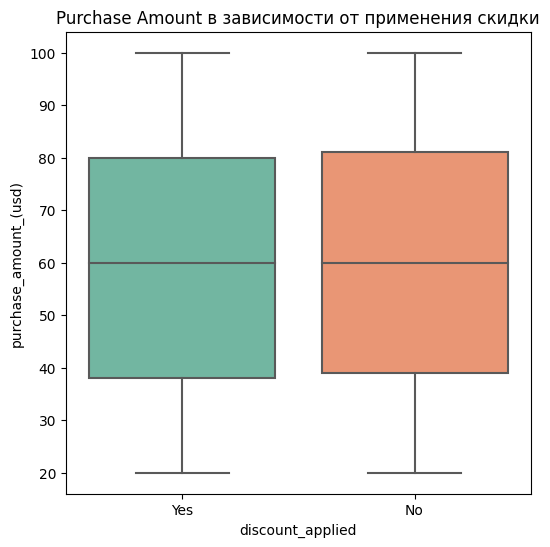

In [ ]:
# Строим boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(x='discount_applied', y='purchase_amount_(usd)', data=df, palette='Set2')
plt.title('Purchase Amount в зависимости от применения скидки')
plt.show()

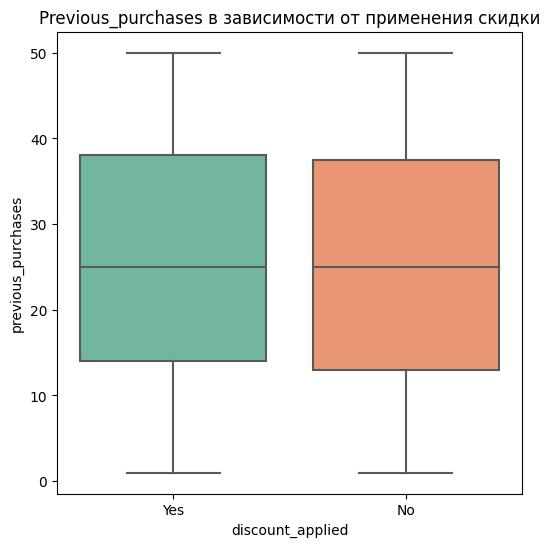

In [ ]:
# Строим boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(x='discount_applied', y='previous_purchases', data=df, palette='Set2')
plt.title('Previous_purchases в зависимости от применения скидки')
plt.show()

Статистики числовых признаков практическ одинаковы для класса "yes' и для класса 'no'.

## 3. Предварительная оценка признаков с использованием библиотеки Pandas

### Разделим признаки на числовые и категориальные.

In [ ]:
cat_columns = [] # создаем пустой список для имен колонок категориальных данных
num_columns = [] # создаем пустой список для имен колонок числовых данных

for column_name in df.columns: # смотрим на все колонки в DataFrame
    if column_name == 'customer_id':
      continue

    if (df[column_name].dtypes == object): # проверяем тип данных для каждой колонки
        cat_columns.append(column_name) # если тип объект - то складываем в категориальные данные
    else:
        num_columns.append(column_name) # иначе - числовые

# выводим результат
print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['gender', 'item_purchased', 'category', 'location', 'size', 'color', 'season', 'subscription_status', 'payment_method', 'shipping_type', 'discount_applied', 'promo_code_used', 'preferred_payment_method', 'frequency_of_purchases'] 
 Число столблцов =  14
Числовые данные:	  ['age', 'purchase_amount_(usd)', 'review_rating', 'previous_purchases'] 
 Число столблцов =  4


### Проведем оценку распределения классов

In [ ]:
#Проверим распределение числовых признаков в зависимости от применения скидок
df.groupby(['discount_applied']).agg('mean', numeric_only=True)[num_columns]

,age,purchase_amount_(usd),review_rating,previous_purchases
discount_applied,,,,
No,44.010796,60.130454,3.757715,25.056230
Yes,44.144902,59.279070,3.739654,25.742993


In [ ]:
#Проверим, как много покупателей пользуются скидками
df['discount_applied'].value_counts()

No     2223
Yes    1677
Name: discount_applied, dtype: int64

In [ ]:
#Проверим, как много покупателей применяют промокоды
df['promo_code_used'].value_counts()

No     2223
Yes    1677
Name: promo_code_used, dtype: int64

Сопоставление данных позволяют сделать следующие выводы:
1. Скидками пользуются 43% покупателей. При этом они покупают товары (Purchase Amount (USD)) на сумму почти равную (0.496%) объему покупок, совершаемых без скидок.
2. По всей видимости скидки есть результат применения промокодов. Эту информацию в реальнах условиях можно уточнить у менеджмента или собственнкиа магазина.
3. Таким образом,  понимание условий, когда покупатели воспользуются скидками может иметь значение для выручки и прибыли магазина.

###Проанализируем применение скидок в зависимости от различных признаков - категории товаров, сезонности и т.д.

In [ ]:
#Создадим функцию для анализа применения скидок в зависимости от различных признаков
#Визуализируем в виде вертикальной диаграммы
def plot_category_counts(data, category_column, discount_column, xlabel, ylabel, title):
    category_discount = data.groupby(category_column)[discount_column].apply(lambda x: (x == 'Yes').sum())
    category_discount = category_discount.sort_values(ascending=False)

    plt.bar(category_discount.index, category_discount.values)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


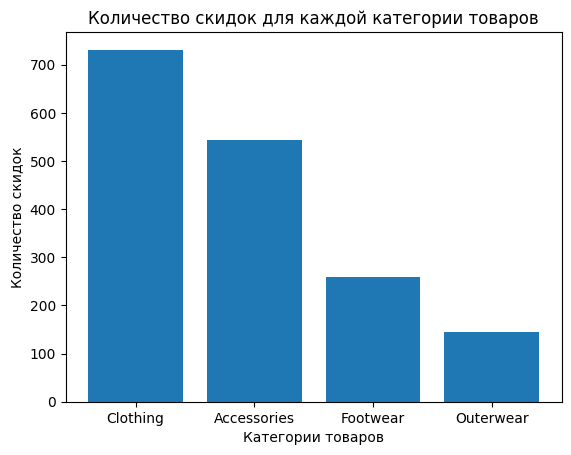

In [ ]:
# Скидки в зависимости от категории товаров
plot_category_counts(df, 'category', 'discount_applied', 'Категории товаров', 'Количество скидок', 'Количество скидок для каждой категории товаров')

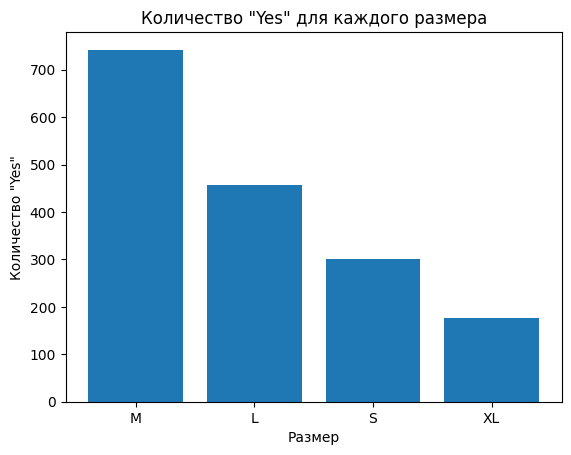

In [ ]:
# Использование функции для анализа категории "Size"
plot_category_counts(df, 'size', 'discount_applied', 'Размер', 'Количество "Yes"', 'Количество "Yes" для каждого размера')

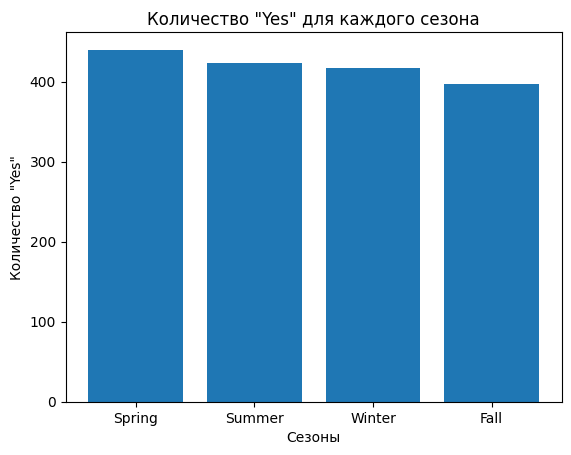

In [ ]:
# Использование функции для анализа категории "Season"
plot_category_counts(df, 'season', 'discount_applied', 'Сезоны', 'Количество "Yes"', 'Количество "Yes" для каждого сезона')

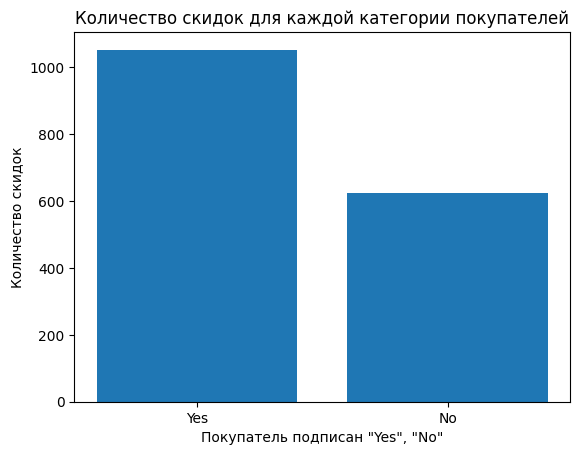

In [ ]:
# Использование функции для анализа категории "Subscription Status"
plot_category_counts(df, 'subscription_status', 'discount_applied', 'Покупатель подписан "Yes", "No"', 'Количество скидок', 'Количество скидок для каждой категории покупателей')

In [ ]:
#Создадим функцию для анализа применения скидок в зависимости от различных признаков
#Визуализируем в виде горизонтальной диаграммы
def plot_category_counts_h(data, category_column, discount_column, xlabel, ylabel, title):
    category_discount = data.groupby(category_column)[discount_column].apply(lambda x: (x == 'Yes').sum())
    category_discount = category_discount.sort_values(ascending=False)

    plt.barh(category_discount.index, category_discount.values)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


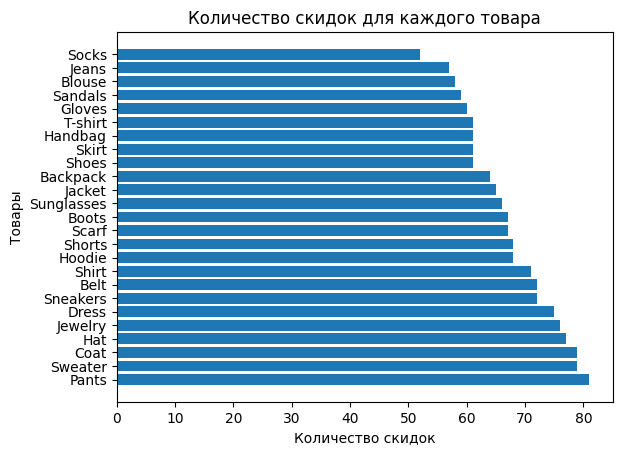

In [ ]:
plot_category_counts_h(df, 'item_purchased', 'discount_applied', 'Количество скидок', 'Товары', 'Количество скидок для каждого товара')

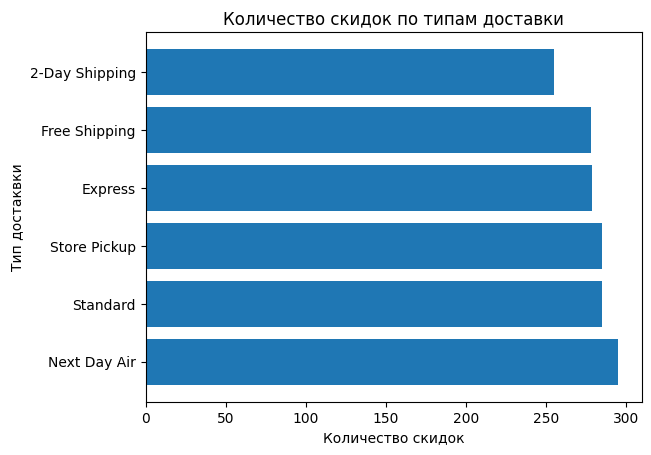

In [ ]:
plot_category_counts_h(df, 'shipping_type', 'discount_applied', 'Количество скидок', 'Тип достаквки', 'Количество скидок по типам доставки')

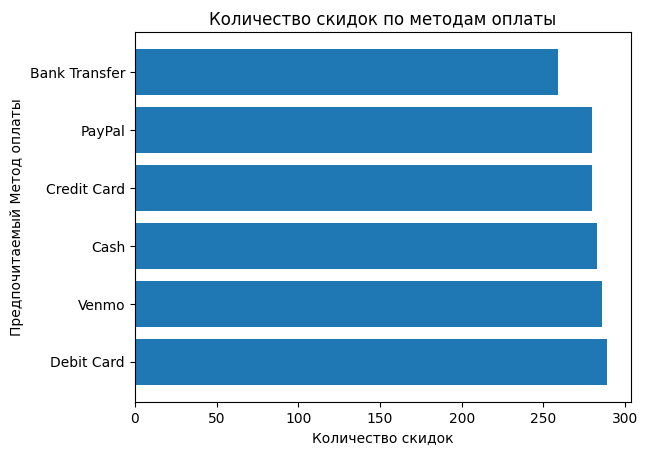

In [ ]:
plot_category_counts_h(df, 'preferred_payment_method', 'discount_applied', 'Количество скидок', 'Предпочитаемый Метод оплаты', 'Количество скидок по методам оплаты')


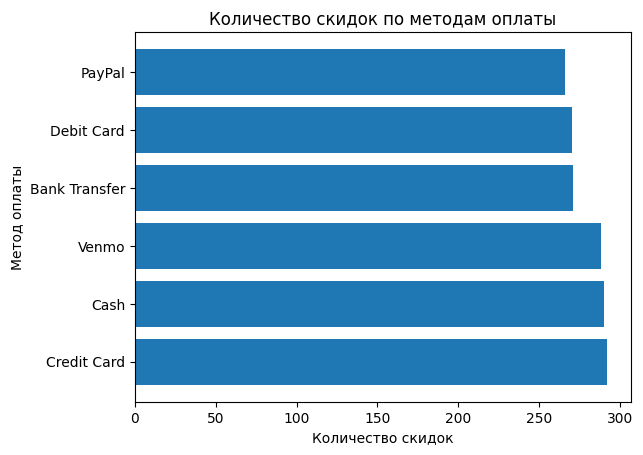

In [ ]:
plot_category_counts_h(df, 'payment_method', 'discount_applied', 'Количество скидок', 'Метод оплаты', 'Количество скидок по методам оплаты')

Основные выводы:
1. Визуализировали распределение классов целевой переменной по числовым признакам - purchase_amount_(usd) и	previous_purchases.
2. Выяснили, что покупателей, которые пользуются скидками 43%, но они приобретают товары в том же объеме, что и покупатели, каоторые не пользуются скидками.
3. Проанализировали распределение классов целевой переменной в зависимости от других категориальных данных - сезоннсоти, статуса покупателей, категории товара и других признаков.

Покупатели активно пользуются скидками в любой сезон и  независимо от типа доставки товаров. В большей степени покупатели пользуются скидками:
1. Если они подписаны на рассылку.
2. При покупке товаров с размерами M, L.
3. При покупке одежды и аксесуаров.



# 4. Предобработка данных

In [ ]:
plt.style.use('bmh') # выбираем стиль для отрисовки

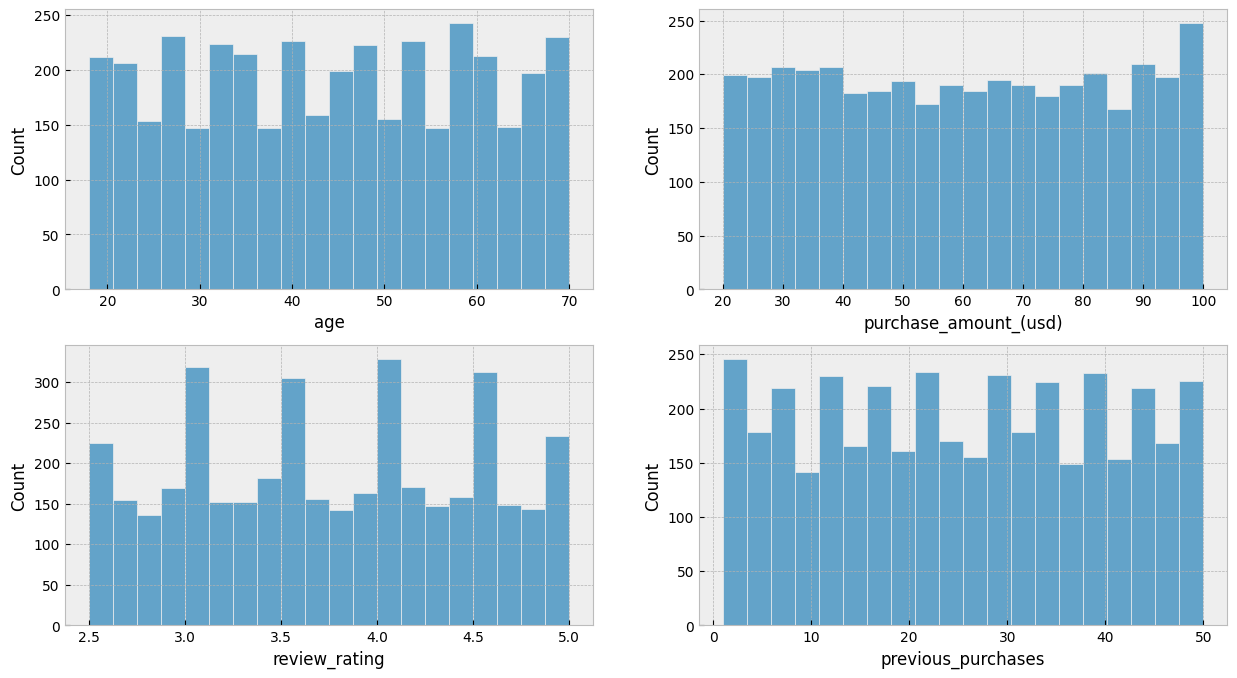

In [ ]:
#Проанализируем распределение числовых признаков по 20 корзинам
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(15,8)) # создаем "полотно", на котором будем "рисовать" графики
#     ↑  более точная структура (почти синоним subplot). Говорим что у нас будет height строк и width столбцов

for idx, column_name in enumerate(num_columns): # перебираем все числовые данные
    plt.subplot(height,width, idx+1) #берем конкретную ячейку из заранее подготовленную заготовки
    # рисуем с помощью библиотеки seaborn
    sns.histplot(data=df, # какой датафрейм используем
            x=column_name, # какую переменную отрисовываем
            bins = 20);  # на сколько ячеек разбиваем

На первый взгляд гистограммы показывают прямоугольное распределение (равномерное распределение). Это означает, что значения имеют примерно одинаковую частоту появления. Однако в признаках наблюдается несколько пиков. Это похоже на мультимодальное распределение: данные могут содержать несколько групп, подгрупп или кластеров, каждый из которых имеет свою характерную частоту появления.

In [ ]:
df.corr(numeric_only=True)

,customer_id,age,purchase_amount_(usd),review_rating,previous_purchases
customer_id,1.000000,-0.004079,0.011048,0.001343,-0.039159
age,-0.004079,1.000000,-0.010424,-0.021949,0.040445
purchase_amount_(usd),0.011048,-0.010424,1.000000,0.030776,0.008063
review_rating,0.001343,-0.021949,0.030776,1.000000,0.004229
previous_purchases,-0.039159,0.040445,0.008063,0.004229,1.000000


Между числовыми признаками корреляции не наблюдается.

In [ ]:
df.describe()

,customer_id,age,purchase_amount_(usd),review_rating,previous_purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


## 4. Предварительная обработка числовых признаков

In [ ]:
scale = StandardScaler()

scale.fit(df[num_columns]);

In [ ]:
scaled = scale.transform(df[num_columns])
df_standard = pd.DataFrame(scaled, columns= num_columns)
df_standard

,age,purchase_amount_(usd),review_rating,previous_purchases
0,0.718913,-0.285629,-0.907584,-0.785831
1,-1.648629,0.178852,-0.907584,-1.616552
2,0.390088,0.558882,-0.907584,-0.162789
3,-1.517099,1.276716,-0.349027,1.637107
4,0.061263,-0.454531,-1.466141,0.391025
...,...,...,...,...
3895,-0.267563,-1.341267,0.628448,0.460252
3896,0.521618,-0.454531,1.047366,1.083293
3897,0.127028,-1.130139,-1.186862,-0.093563
3898,-0.004502,0.727784,0.069891,-0.093563


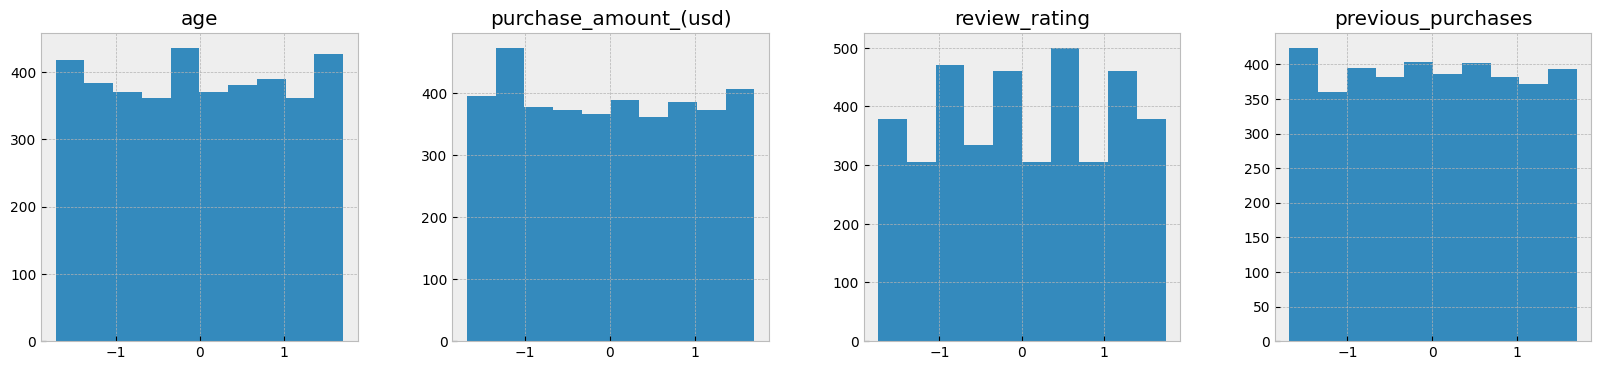

In [ ]:
df_standard.hist(figsize = (20,4), layout= (1,4));

In [ ]:
norm = MinMaxScaler()

norm.fit(df[num_columns]);

normolized = norm.transform(df[num_columns])
df_norm = pd.DataFrame(normolized, columns= num_columns)
df_norm

,age,purchase_amount_(usd),review_rating,previous_purchases
0,0.711538,0.4125,0.24,0.265306
1,0.019231,0.5500,0.24,0.020408
2,0.615385,0.6625,0.24,0.448980
3,0.057692,0.8750,0.40,0.979592
4,0.519231,0.3625,0.08,0.612245
...,...,...,...,...
3895,0.423077,0.1000,0.68,0.632653
3896,0.653846,0.3625,0.80,0.816327
3897,0.538462,0.1625,0.16,0.469388
3898,0.500000,0.7125,0.52,0.469388


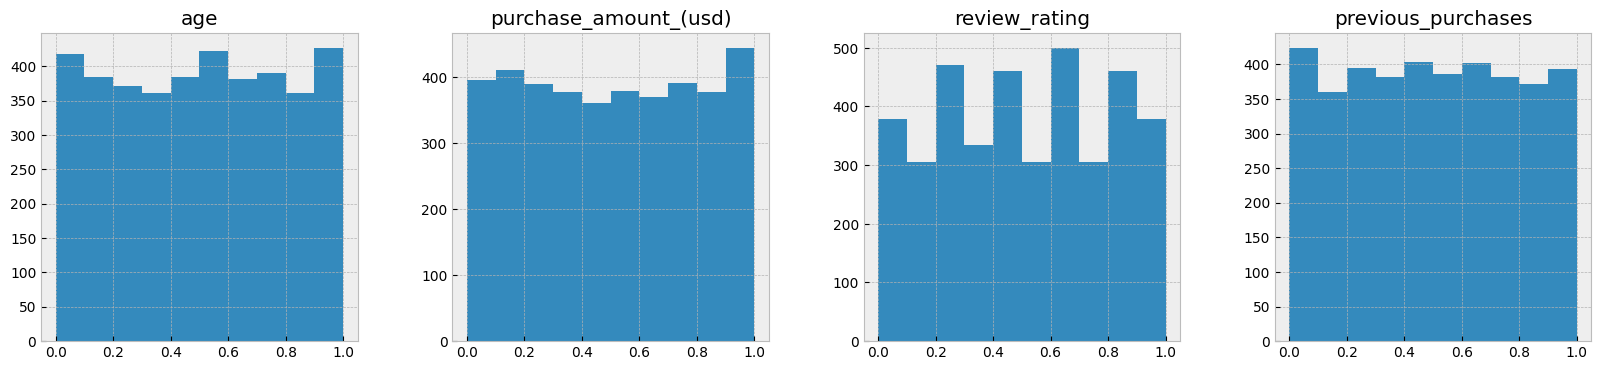

In [ ]:
df_norm.hist(figsize = (20,4), layout= (1,4));

## Предварительная обработка категориальных признаков

In [ ]:
df[cat_columns].nunique()

gender                       2
item_purchased              25
category                     4
location                    50
size                         4
color                       25
season                       4
subscription_status          2
payment_method               6
shipping_type                6
discount_applied             2
promo_code_used              2
preferred_payment_method     6
frequency_of_purchases       7
dtype: int64

In [ ]:
ordinal = OrdinalEncoder()
ordinal.fit(df[cat_columns]);

Ordinal_encoded = ordinal.transform(df[cat_columns])
df_ordinal = pd.DataFrame(Ordinal_encoded, columns = cat_columns)
df_ordinal

,gender,item_purchased,category,location,size,color,season,subscription_status,payment_method,shipping_type,discount_applied,promo_code_used,preferred_payment_method,frequency_of_purchases
0,1.0,2.0,1.0,16.0,0.0,7.0,3.0,1.0,2.0,1.0,1.0,1.0,5.0,3.0
1,1.0,23.0,1.0,18.0,0.0,12.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,3.0
2,1.0,11.0,1.0,20.0,2.0,12.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,6.0
3,1.0,14.0,2.0,38.0,1.0,12.0,1.0,1.0,4.0,3.0,1.0,1.0,4.0,6.0
4,1.0,2.0,1.0,36.0,1.0,21.0,1.0,1.0,1.0,2.0,1.0,1.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0.0,9.0,1.0,45.0,0.0,21.0,2.0,0.0,1.0,0.0,0.0,0.0,5.0,6.0
3896,0.0,0.0,0.0,14.0,0.0,23.0,1.0,0.0,4.0,5.0,0.0,0.0,0.0,1.0
3897,0.0,1.0,0.0,29.0,0.0,8.0,1.0,0.0,2.0,4.0,0.0,0.0,5.0,5.0
3898,0.0,17.0,2.0,22.0,2.0,3.0,2.0,0.0,4.0,1.0,0.0,0.0,5.0,6.0


In [ ]:
ohe = OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse=False)
ohe.fit(df[cat_columns]);

ohe_feat = ohe.transform(df[cat_columns])

df_ohe = pd.DataFrame(ohe_feat, columns = ohe.get_feature_names_out()).astype(int)

df_ohe

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,gender_Male,item_purchased_Backpack,item_purchased_Belt,item_purchased_Blouse,item_purchased_Boots,item_purchased_Coat,item_purchased_Dress,item_purchased_Gloves,item_purchased_Handbag,item_purchased_Hat,...,preferred_payment_method_Debit Card,preferred_payment_method_PayPal,preferred_payment_method_Venmo,frequency_of_purchases_Annually,frequency_of_purchases_Bi-Weekly,frequency_of_purchases_Every 3 Months,frequency_of_purchases_Fortnightly,frequency_of_purchases_Monthly,frequency_of_purchases_Quarterly,frequency_of_purchases_Weekly
0,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3896,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3897,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3898,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


## Создание Pipline

In [ ]:
# Создаем Pipeline для стандартизации числовых признаков
num_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('min_max_scaler', MinMaxScaler())
])

num_pipe_list = ['age', 'purchase_amount_(usd)', 'previous_purchases']


In [ ]:
# Создаем пайплайн для порядкового кодирования
cat_pipe_ordinal_encoding = Pipeline([
    ('encoder', OrdinalEncoder())
])

cat_features_ord = ['gender', 'subscription_status']


In [ ]:
# Создаем пайплайн для one-hot encoding
cat_pipe_onehot_encoding = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])

cat_features_onehot = ['item_purchased', 'category', 'size', 'season', 'payment_method', 'frequency_of_purchases']

## Трансформер Колонок Данных

In [ ]:
# Сделаем отдельно Pipeline с числовыми признаками
preprocessors_num = ColumnTransformer(transformers=[
    ('num_pipe_list', num_pipe, num_pipe_list),
])

preprocessors_num

ColumnTransformer(transformers=[('num_pipe_list',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('min_max_scaler',
                                                  MinMaxScaler())]),
                                 ['age', 'purchase_amount_(usd)',
                                  'previous_purchases'])])

In [ ]:
#Pipeline со всеми признаками
preprocessors_all = ColumnTransformer(transformers=[
    ('num_pipe_list', num_pipe, num_pipe_list),
    ('cat_features_ord', cat_pipe_ordinal_encoding, cat_features_ord),
    ('cat_features_onehot', cat_pipe_onehot_encoding, cat_features_onehot),
])

preprocessors_all

ColumnTransformer(transformers=[('num_pipe_list',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('min_max_scaler',
                                                  MinMaxScaler())]),
                                 ['age', 'purchase_amount_(usd)',
                                  'previous_purchases']),
                                ('cat_features_ord',
                                 Pipeline(steps=[('encoder',
                                                  OrdinalEncoder())]),
                                 ['gender', 'subscription_status']),
                                ('cat_features_onehot',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['item_purchased', 'category', 'size',
                                  'season', 'payment_method',
                                  'frequency_of_purchases'])])

In [ ]:
preprocessors_num.fit(df);

In [ ]:
preprocessors_all.fit(df);

In [ ]:
columns_num = np.hstack([num_pipe_list])

In [ ]:
preprocessors_all.transformers_

[('num_pipe_list',
  Pipeline(steps=[('scaler', StandardScaler()),
                  ('min_max_scaler', MinMaxScaler())]),
  ['age', 'purchase_amount_(usd)', 'previous_purchases']),
 ('cat_features_ord',
  Pipeline(steps=[('encoder', OrdinalEncoder())]),
  ['gender', 'subscription_status']),
 ('cat_features_onehot',
  Pipeline(steps=[('encoder',
                   OneHotEncoder(drop='if_binary', handle_unknown='ignore',
                                 sparse_output=False))]),
  ['item_purchased',
   'category',
   'size',
   'season',
   'payment_method',
   'frequency_of_purchases']),
 ('remainder', 'drop', [0, 6, 8, 10, 13, 14, 15, 17])]

In [ ]:
preprocessors_all.transformers_[2][1]['encoder'].get_feature_names_out(cat_features_onehot)

array(['item_purchased_Backpack', 'item_purchased_Belt',
       'item_purchased_Blouse', 'item_purchased_Boots',
       'item_purchased_Coat', 'item_purchased_Dress',
       'item_purchased_Gloves', 'item_purchased_Handbag',
       'item_purchased_Hat', 'item_purchased_Hoodie',
       'item_purchased_Jacket', 'item_purchased_Jeans',
       'item_purchased_Jewelry', 'item_purchased_Pants',
       'item_purchased_Sandals', 'item_purchased_Scarf',
       'item_purchased_Shirt', 'item_purchased_Shoes',
       'item_purchased_Shorts', 'item_purchased_Skirt',
       'item_purchased_Sneakers', 'item_purchased_Socks',
       'item_purchased_Sunglasses', 'item_purchased_Sweater',
       'item_purchased_T-shirt', 'category_Accessories',
       'category_Clothing', 'category_Footwear', 'category_Outerwear',
       'size_L', 'size_M', 'size_S', 'size_XL', 'season_Fall',
       'season_Spring', 'season_Summer', 'season_Winter',
       'payment_method_Bank Transfer', 'payment_method_Cash',
       'p

## Выводы по проделанной работе:
1. Разделили признаки на числовые и категориальные.
2. Выделили в качестве целевого признака Discount Applied с двумя классами - 'Yes' и 'No'.
3. Провели предобработку данных с помощью технологии Pipline.

# 5. Логистическая Регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression # Логистичекая регрессия от scikit-learn

from sklearn.model_selection import train_test_split#  функция разбиения на тренировочную и тестовую выборку
# в исполнении scikit-learn

from sklearn.model_selection import StratifiedKFold # при кросс-валидации разбиваем данные в пропорции целевой метки
from sklearn.model_selection import cross_validate # функция кросс-валидации от Scikit-learn

from sklearn.metrics import f1_score # f1-мера от Scikit-learn
from sklearn.metrics import classification_report # функция scikit-learn которая считает много метрик классификации

from sklearn.preprocessing import LabelEncoder# Импортируем LabelEncoder от scikit-learn

In [ ]:
# не забываем удалить целевую переменную "тип трансмиссии" из признаков
X,y = df.drop(columns = ['discount_applied']), df['discount_applied']

## Приводим целевые метки к 0 и 1

In [ ]:
Label = LabelEncoder()
Label.fit(y) # задаем столбец, который хотим преобразовать
Label.classes_ # в аттрибуте .classes_ хранится информация "какой класс как шифруется"

array(['No', 'Yes'], dtype=object)

In [ ]:
target = Label.transform(y) # преобразуем и сохраняем в новую переменную
target

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
# разбиваем на тренировочную и валидационную
X_train, X_val, y_train, y_val = train_test_split(X, target,
                                                    test_size=0.3,
                                                    random_state=42)

## Оценим модель с использованием только числовых данных

In [ ]:
# Сначала обучаем на тренировочных данных
X_train_prep = preprocessors_num.fit_transform(X_train)
# потом на валидационной
X_val_prep = preprocessors_num.transform(X_val)

In [ ]:
model = LogisticRegression(random_state = 42)

model.fit(X_train_prep, y_train);

## Функции для анализа обученной модели

In [ ]:
def get_coefs (model):
    """Берем веса как атрибуты обученной модели.
    Входные переменные:
    ===========
    model: обученная модель
    """
    B0=model.intercept_[0]
    B=model.coef_[0]
    return B0, B

In [ ]:
def print_model (B0,B,features_names):
    """Написание уравнения модели.
    Входные переменные:
    ===========
    B0: смещение (независимый коэффициент)
    weights: веса признаков
    features_names: список названий признаков
    """
    line='{:.3f}'.format(B0)
    sign=['+','-']
    for p,(fn,b) in enumerate(zip(features_names,B)):
        line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn

    print('Решение')
    print(line)

In [ ]:
def vis_weigths(weights,features_names = None, width = 1200, height = 600):
    """Отрисовка весов.
    Входные переменные:
    ===========
    weights: веса признаков
    features_names: список названий признаков
    """
    numbers = np.arange(0,len(weights))                 # создаем массив от 0 до количество весов-1
    if features_names:
        tick_labels = np.hstack(['B0',features_names])
    else:
        tick_labels = ['B'+str(num) for num in numbers] # создаем "названия" весов
    fig = go.Figure()
    fig.add_trace(go.Bar(x=numbers[weights<0], y=weights[weights<0],
                    marker_color='red',
                    name='отрицательные веса'))
    fig.add_trace(go.Bar(x=numbers[weights>=0], y=weights[weights>=0],
                    marker_color='blue',
                    name='положительные веса'
                    ))

    fig.update_layout(
                title="Веса модели",
                width=width,
                height=height,
                template = "plotly_dark",
                xaxis = dict(
                                         tickmode = 'array',
                                         tickvals = numbers,
                                         ticktext = tick_labels,
                                         )
                )

    fig.show()

In [ ]:
B0, B = get_coefs(model)
features_names = list(columns_num)
print_model(B0,B,features_names)

Решение
-0.351+0.02*age-0.00*purchase_amount_(usd)+0.03*previous_purchases


In [ ]:
Bs = np.hstack([B0,B])
vis_weigths(Bs,features_names)

## Оценка метрик

In [ ]:
def calculate_metric(model_pipe, X, y, metric = f1_score):
    """Расчет метрики.
    Параметры:
    ===========
    model_pipe: модель или pipeline
    X: признаки
    y: истинные значения
    metric: метрика (f1 - по умолчанию)
    """
    y_model = model_pipe.predict(X)
    return metric(y, y_model)

In [ ]:
print(f"f1 на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train):.4f}")
print(f"f1 на валидационной выборке: {calculate_metric(model, X_val_prep, y_val):.4f}")

f1 на тренировочной выборке: 0.0000
f1 на валидационной выборке: 0.0000


In [ ]:
print(classification_report(y_val, model.predict(X_val_prep), target_names=Label.classes_, zero_division=1))

              precision    recall  f1-score   support

          No       0.54      1.00      0.70       635
         Yes       1.00      0.00      0.00       535

    accuracy                           0.54      1170
   macro avg       0.77      0.50      0.35      1170
weighted avg       0.75      0.54      0.38      1170



## Кросс-валидация

In [ ]:
def cross_validation (X, y, model, scoring, cv_rule):
    """Расчет метрик на кросс-валидации.
    Параметры:
    ===========
    model: модель или pipeline
    X: признаки
    y: истинные значения
    scoring: словарь метрик
    cv_rule: правило кросс-валидации
    """
    scores = cross_validate(model,X, y,
                      scoring=scoring, cv=cv_rule )
    print('Ошибка на кросс-валидации')
    DF_score = pd.DataFrame(scores)
    display(DF_score)
    print('\n')
    print(DF_score.mean()[2:])

In [ ]:
scoring_clf = {'ACC': 'accuracy',
           'F1': 'f1',
           'Precision': 'precision',
           'Recall': 'recall'}

In [ ]:
cross_validation (X_train_prep, y_train,
                  model,
                  scoring_clf,
                  StratifiedKFold(n_splits=5, shuffle= True, random_state = 42))

Ошибка на кросс-валидации


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/

,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,0.007990,0.005625,0.580586,0.0,0.0,0.0
1,0.004171,0.004790,0.580586,0.0,0.0,0.0
2,0.004714,0.004932,0.582418,0.0,0.0,0.0
3,0.003919,0.004713,0.582418,0.0,0.0,0.0
4,0.004165,0.004790,0.582418,0.0,0.0,0.0




test_ACC          0.581685
test_F1           0.000000
test_Precision    0.000000
test_Recall       0.000000
dtype: float64


Небольшие выводы по модели:

используя только числовые признаки невозможно предсказывать воспользуется ли покупатель скидкой или нет.


## Объединяем Pipeline Предобработки и Модель

In [ ]:
pipe_num = Pipeline([
    ('preprocessors', preprocessors_num),
    ('model', LogisticRegression(random_state = 42))
])

In [ ]:
pipe_num['preprocessors']

ColumnTransformer(transformers=[('num_pipe_list',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('min_max_scaler',
                                                  MinMaxScaler())]),
                                 ['age', 'purchase_amount_(usd)',
                                  'previous_purchases'])])

In [ ]:
pipe_num['model']

LogisticRegression(random_state=42)

In [ ]:
pipe_num.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_pipe_list',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('min_max_scaler',
                                                                   MinMaxScaler())]),
                                                  ['age',
                                                   'purchase_amount_(usd)',
                                                   'previous_purchases'])])),
                ('model', LogisticRegression(random_state=42))])

In [ ]:
B0, B = get_coefs(pipe_num['model'])
features_names = list(columns_num)

print_model (B0,B,features_names)

Решение
-0.351+0.02*age-0.00*purchase_amount_(usd)+0.03*previous_purchases


In [ ]:
print(f"f1 на тренировочной выборке: {calculate_metric(pipe_num, X_train, y_train):.4f}")
print(f"f1 на валидационной выборке: {calculate_metric(pipe_num, X_val, y_val):.4f}")

f1 на тренировочной выборке: 0.0000
f1 на валидационной выборке: 0.0000


## Оценим влияние категориальных признаков

In [ ]:
pipe_all = Pipeline([
    ('preprocessors', preprocessors_all),
    ('model', LogisticRegression(random_state = 42))
    ])

In [ ]:
pipe_all.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_pipe_list',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('min_max_scaler',
                                                                   MinMaxScaler())]),
                                                  ['age',
                                                   'purchase_amount_(usd)',
                                                   'previous_purchases']),
                                                 ('cat_features_ord',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['gender',
                                                   'subscription_status']),
                                                 ('cat_features_onehot',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['item_purchased', 'category',
                                                   'size', 'season',
                                                   'payment_method',
                                                   'frequency_of_purchases'])])),
                ('model', LogisticRegression(random_state=42))])

In [ ]:
cat_features_onehot_n = preprocessors_all.transformers_[2][1]['encoder'].get_feature_names_out(cat_features_onehot)

columns = np.hstack([num_pipe_list, cat_features_ord, cat_features_onehot_n])

In [ ]:
B0, B = get_coefs(pipe_all['model'])
features_names = list(columns)

print_model (B0,B,features_names)

Решение
-5.079-0.13*age-0.01*purchase_amount_(usd)-0.42*previous_purchases+4.85*gender+5.47*subscription_status-0.18*item_purchased_Backpack+0.24*item_purchased_Belt+0.08*item_purchased_Blouse+0.63*item_purchased_Boots+0.17*item_purchased_Coat-0.30*item_purchased_Dress-0.29*item_purchased_Gloves+0.08*item_purchased_Handbag+0.63*item_purchased_Hat+0.38*item_purchased_Hoodie-0.34*item_purchased_Jacket-0.01*item_purchased_Jeans+0.11*item_purchased_Jewelry+0.03*item_purchased_Pants-0.32*item_purchased_Sandals-0.09*item_purchased_Scarf+0.08*item_purchased_Shirt-0.44*item_purchased_Shoes-0.04*item_purchased_Shorts-0.29*item_purchased_Skirt+0.29*item_purchased_Sneakers-0.43*item_purchased_Socks-0.45*item_purchased_Sunglasses+0.27*item_purchased_Sweater+0.20*item_purchased_T-shirt+0.04*category_Accessories-0.04*category_Clothing+0.17*category_Footwear-0.17*category_Outerwear+0.02*size_L-0.00*size_M+0.19*size_S-0.21*size_XL-0.33*season_Fall+0.12*season_Spring+0.06*season_Summer+0.15*season_Wint

In [ ]:
def vis_weigths_threshold(weights, feature_names, threshold, width = 1200, height = 600):
    """Отрисовка весов с фильтром.
    Входные переменные:
    ===========
    weights: веса признаков
    features_names: список названий признаков
    threshold: порог "значимости" коэффициентов
    """
    # фильтруем веса коэффициентов
    mask = np.abs(weights) >= threshold
    weights_filtered = weights[mask]
    feature_names_filtered = [name for name, m in zip(feature_names, mask[1:]) if m]

    # Рисуем столбчатую диаграмму
    vis_weigths(weights_filtered,feature_names_filtered, width = width, height = height)

In [ ]:
Bs = np.hstack([B0,B])
vis_weigths_threshold(Bs,columns, 0.1,  width = 1600)

In [ ]:
print(f"f1 на тренировочной выборке: {calculate_metric(pipe_all, X_train, y_train):.4f}")
print(f"f1 на валидационной выборке: {calculate_metric(pipe_all, X_val, y_val):.4f}")

f1 на тренировочной выборке: 0.7966
f1 на валидационной выборке: 0.7699


In [ ]:
print(classification_report(y_val, pipe_all.predict(X_val), target_names=Label.classes_))

              precision    recall  f1-score   support

          No       0.78      0.92      0.84       635
         Yes       0.87      0.69      0.77       535

    accuracy                           0.81      1170
   macro avg       0.83      0.80      0.81      1170
weighted avg       0.82      0.81      0.81      1170



In [ ]:
cross_validation (X_train, y_train,
                  pipe_all,
                  scoring_clf,
                  StratifiedKFold(n_splits=5, shuffle= True, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,0.112961,0.044594,0.829670,0.774818,0.869565,0.698690
1,0.133421,0.029186,0.831502,0.774510,0.882682,0.689956
2,0.140822,0.021713,0.820513,0.750000,0.896341,0.644737
3,0.101428,0.068838,0.840659,0.779747,0.922156,0.675439
4,0.134972,0.041684,0.815018,0.761229,0.825641,0.706140




test_ACC          0.827473
test_F1           0.768061
test_Precision    0.879277
test_Recall       0.682992
dtype: float64


Выводы по модели:

1. Категориальные признаки  оказывают решающее значение в предсказаниях модели.
2. Гендре и подписка на рассылку магазина в наибольшей степени влияют на предсказание.
3. На кросс-валидации метрика растет до 0.82.